# Нейрон и нейронная сеть

## Математическая модель нейрона

На вход нейрона подаются сигналы $$ x_1, x_2 ... x_n $$ Эти параметры умножаются на веса $$ w_1, w_2 ... w_n $$ Далее они передаются в нейрон(сумматор), в котором также есть параметр смещения b и получается сумма: $$ z = x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b$$ Результат попадает в функцию активации $$ y=f(z)=f(x_1*w_1 + x_2*w_2 + ... + x_n*w_n + b)$$ Веса и смещения настриваемые параметры Также можно записать по-другому: $$ y = f(\sum_{i=0}^{N-1} w_i*x_i + b)$$ Запись через скалярное произведение: $$y = f(<\overrightarrow{w} \overrightarrow{x}> + b)$$ Функция активации - пороговая. Пока не накопится достаточно заряда - ничего не происходит. когда накопится достаточно заряда - нейрон даёт сигнал.
\begin{equation*}
f(z) =
 \begin{cases}
   0 &\text{if z $\leq 0$}\\
   1&\text{if z $>0$}
 \end{cases}
\end{equation*}
Место, где функция будем менять своё значение с нуля на единицу - разделяющая поверхность.
Разделяющая поверхность находится там, где аргумент функции равен нулю. Она задаётся вектором $\overrightarrow{w}$ и смещение b

Сигмоида $$\sigma(x) = \frac{1}{1+e^{-x}}$$
\begin{equation*}
 \begin{cases}
   x \rightarrow \infty: \sigma(x) \rightarrow 1\\
   x \rightarrow -\infty: \sigma(x) \rightarrow 0\\
   0 < \sigma(x) < 1
 \end{cases}
\end{equation*}

## Булевы операции в виде нейронов

### Нейрон "Не"

\begin{equation*}
 \begin{cases}
   w*0 + b > 0 \\
   w*1 + b \leq 0
 \end{cases}
\end{equation*}

\begin{equation*}
 \begin{cases}
   b > 0 \\
   w \leq -b
 \end{cases}
\end{equation*}

### нейрон "И"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([1,0,0,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,1
.,1,0,0
.,0,1,0
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b > 0 \\
   w_1 + b \leq 0 \\
   w_2 + b \leq 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

### оператор "ИЛИ"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([1,1,1,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,1
.,1,0,1
.,0,1,1
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b > 0 \\
   w_1 + b > 0 \\
   w_2 + b > 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

### Исключающее "ИЛИ"

In [ ]:
import pandas as pd
s1 = pd.Series([1,1,0,0], name = 'x1')
s2 = pd.Series([1,0,1,0], name = 'x2')
s3 = pd.Series([0,1,1,0], name = 'x1 & x2')
df = pd.DataFrame([s1,s2,s3]).T
df.index = ['.','.','.','.']
df

,x1,x2,x1 & x2
.,1,1,0
.,1,0,1
.,0,1,1
.,0,0,0


\begin{equation*}
 \begin{cases}
   w_1 + w_2 + b \leq 0 \\
   w_1 + b > 0 \\
   w_2 + b > 0 \\
   b \leq 0
 \end{cases}
\end{equation*}

Задача построения нейрона нерешаема

Нужно использовать 3+ нейронов для решения этой задачи. Сеть нейронов позволяет сделать нелинейную операцию

## Базовая работа в pytorch

Нейронные сети мы будем изучать с помощью библиотеки pytorch

In [ ]:
import torch

Основная структура торча - тензоры, многомерные матрицы

In [ ]:
torch.zeros([3,4])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones([3,4,3])

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [ ]:
torch.Tensor([[1,2,3,4,],
              [5,6,7,8,],
              [9,10,11,12]])

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [ ]:
x = torch.Tensor([[1,2,3,4,],
              [5,6,7,8,],
              [9,10,11,12]])

In [ ]:
x.size() #размерность

torch.Size([3, 4])

In [ ]:
x.shape

torch.Size([3, 4])

In [ ]:
x[0]

tensor([1., 2., 3., 4.])

In [ ]:
x[1]

tensor([5., 6., 7., 8.])

In [ ]:
x[0,0]

tensor(1.)

In [ ]:
x[:, 0]

tensor([1., 5., 9.])

In [ ]:
x + 10

tensor([[11., 12., 13., 14.],
        [15., 16., 17., 18.],
        [19., 20., 21., 22.]])

In [ ]:
x ** 2

tensor([[  1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.],
        [ 81., 100., 121., 144.]])

In [ ]:
y = torch.Tensor([[12,11,10,9],
                 [8,7,6,5],
                 [4,3,2,1]])
x + y

tensor([[13., 13., 13., 13.],
        [13., 13., 13., 13.],
        [13., 13., 13., 13.]])

In [ ]:
x * y

tensor([[12., 22., 30., 36.],
        [40., 42., 42., 40.],
        [36., 30., 22., 12.]])

In [ ]:
x / y

tensor([[ 0.0833,  0.1818,  0.3000,  0.4444],
        [ 0.6250,  0.8571,  1.1667,  1.6000],
        [ 2.2500,  3.3333,  5.5000, 12.0000]])

In [ ]:
x % y

tensor([[1., 2., 3., 4.],
        [5., 6., 1., 3.],
        [1., 1., 1., 0.]])

In [ ]:
torch.exp(x) #е в степени икс

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01],
        [1.4841e+02, 4.0343e+02, 1.0966e+03, 2.9810e+03],
        [8.1031e+03, 2.2026e+04, 5.9874e+04, 1.6275e+05]])

In [ ]:
torch.log(x) #десятичный логарифм

tensor([[0.0000, 0.6931, 1.0986, 1.3863],
        [1.6094, 1.7918, 1.9459, 2.0794],
        [2.1972, 2.3026, 2.3979, 2.4849]])

In [ ]:
torch.sin(x)

tensor([[ 0.8415,  0.9093,  0.1411, -0.7568],
        [-0.9589, -0.2794,  0.6570,  0.9894],
        [ 0.4121, -0.5440, -1.0000, -0.5366]])

In [ ]:
x > 3

tensor([[False, False, False,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True]])

In [ ]:
mask = x > 3
x[mask].resh

tensor([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [ ]:
y = x
y[0, 0] = 999
print(x, y, sep='\n')

tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


In [ ]:
y = x.clone() #копирование элементов
y[0,0] = 999
print(x, y, sep='\n')

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])
tensor([[999.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.],
        [  9.,  10.,  11.,  12.]])


In [ ]:
x.dtype #тип элемента

torch.float32

In [ ]:
x = x.double()
print(x)
x = x.int()
print(x)
x = x.float()
print(x)

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64)
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]], dtype=torch.int32)
tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])


In [ ]:
import numpy as  np
x = np.arange(8).reshape((2,4))
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
x = torch.from_numpy(x) #numpy array in tensor
x

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]], dtype=torch.int32)

In [ ]:
x = x.numpy() #tensor in numpy array
x

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [ ]:
x = torch.rand((2000,3000)) #создание массива со случайными числами
x

tensor([[0.4695, 0.0216, 0.0586,  ..., 0.0112, 0.2575, 0.8541],
        [0.6629, 0.7970, 0.2924,  ..., 0.6085, 0.9611, 0.6827],
        [0.6009, 0.9113, 0.6774,  ..., 0.1354, 0.6601, 0.3475],
        ...,
        [0.1191, 0.4120, 0.9852,  ..., 0.8935, 0.0335, 0.4435],
        [0.1245, 0.2955, 0.3423,  ..., 0.6733, 0.5332, 0.3932],
        [0.2697, 0.1318, 0.2657,  ..., 0.9673, 0.7009, 0.6101]])

In [ ]:
torch.cuda.is_available() #проверка наличия куды на компе

False

In [ ]:
torch.device('cuda:0') #девайс, соответствующий видеокарте. Счёт видюх с нуля

device(type='cuda', index=0)

In [ ]:
torch.device('cpu') #девайс, соответствующий процессору

device(type='cpu')

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#автоматический выбор девайса

In [ ]:
x_cuda = x.to(device) #тензор теперь на куде

In [ ]:
%time x_cuda ** 5 ** 0.2 ** 5 ** 0.2

CPU times: total: 109 ms
Wall time: 80 ms


tensor([[0.4064, 0.0104, 0.0341,  ..., 0.0047, 0.1988, 0.8288],
        [0.6128, 0.7632, 0.2313,  ..., 0.5534, 0.9538, 0.6347],
        [0.5453, 0.8953, 0.6289,  ..., 0.0925, 0.6098, 0.2840],
        ...,
        [0.0793, 0.3478, 0.9824,  ..., 0.8745, 0.0175, 0.3798],
        [0.0837, 0.2342, 0.2789,  ..., 0.6244, 0.4728, 0.3290],
        [0.2101, 0.0896, 0.2063,  ..., 0.9612, 0.6550, 0.5552]])

# Строим первую нейронную сеть

## Восстановление зависимости нейронной сетью

Размеченная обучающая выборка состоит из некоторого количество объектов и для этих объектов мы знаем:
признаки $$ x_1, x_2, ... , x_n $$
и метку объекта
$$ y_1, y_2, ... , y_n $$
Например, зависимость ветра от дня. Иксы: порядковый номер дня, какая облачность, какая была температура, какое давление. Игреки: скорость ветра
Перед обучение выборку надо разделить на три датасета: тренировочный, валидационный, тестовый.
Тренировочный - то, что используется для обучения нейронной сети
Валидационный необходим для настройки параметров модели
Тестовый - тот, на котором проверяем окончательный результат

Допустим есть скрытая зависимость $$ y_i = f(x_i)$$
x - давление, y - скорость ветра, f() - некоторая функция. Правильнее писать формулу следующим образом:
$$ y_i = f(x_i) + \epsilon_i $$
где $\epsilon_i$ - погрешность, систематическая или случайная. В терминах: f() - скрытая зависимость, $x_i$ - координата замера, $y_i$ - замеренное значение, $\epsilon_i$ - шум

## Компоненты нейронной сети

Мы хотим восстановить зависимость при помощи нейронной сети. Как построить нейронную сеть?

Во-первых, необходимо определиться с архитектурой нейронной сети.

Во-вторых, необходимо определиться с функцией потерь.

В-третьих, необходимо определиться с методом оптимизации.

В-четвёртых, важно ввести метрики. (насколько хорошо решается задача)

Пример построения нейронной сети.

Пусть всего один аргумент $x_i$ и всего один результат $y_i$. Тогда нейронная сеть должна иметь один вход и один выход.

Придумать архитектуру - значит придумать, как между аргументом и результатом буду происходить вычисления.

Последний нейрон - просто линейный. Между этим нейроном и аргумент поставить много сигмоидных нейронов.

Для того, чтобы обучить, необходимо подобрать параметры у выходного нейрона и у нейронов скрытого слоя таким образом, чтобы
то, что выдаётся нейронной сетью, наилучшим образом подходило к тому, что мы наблюдали

В такой нейронной сети мы сможем настраивать параметры:

веса $w_1^1, w_2^1, ... , w_n^1$ , которые "взвешивают" входных значения в первый и единственный в этой нейронной сети скрытый слой. Эти веса
отвечают за то, насколько круто будет растить соответствующая сигмоида.

Кроме весов скрытого слоя, мы можем настраивать смещеня скрытого слоя $b_1^1, b_2^1, ... , b_n^1$.

Также мы можем настраивать веса второго слоя $w_1^2, w_2^2, ... , w_n^2$
Веса второго слоя будут означать амплитуду соответствующей сигмоиды.
Помимо весов второго слоя мы можем настраивать смещеня второго слоя $b_1^2$

При помощи линейных комбинаций сигмоид можно с любой точностью приблизить любую ограниченную функцию с не более, чем счётным числом
разрывов.

Для восстановления зависимости в качестве функции потерь можно использоваться среднеквадратичную ошибку
$$
MSE=\frac{1}{N} \sum_{i=1}^N (y_i - \overline{y_i})^2
$$

$y_i$ - целевое значение

$\overline{y_i}$ - результат работы нейронной сети, предсказания нашей модели

## Алгоритм настройки нейронной сети

Для настройки параметров нейронной сети будем использовать градиентный спуск. Веса будем описывать вектором
$$
\begin{equation*}
w_0 = \left(
    \begin{array}{c}
    w_0\\
    w_1\\
    \vdots\\
    w_n\\
    \vdots\\
    b_0\\
    b_1\\
    \vdots\\
    b_n
    \end{array}
\right)
\end{equation*}
$$.
Далее берём функцию потерь и считаем её производную, а точнее градиент.

Градиент - вектор, состоящий из производных по каждой из координат функции
$$
\begin{equation*}
    \nabla f = \left(
        \begin{array}{c}
        \frac{\partial f}{\partial w_0} \\
        \frac{\partial f}{\partial w_1} \\
        \vdots\\
        \frac{\partial f}{\partial w_n}
        \end{array}
    \right)
\end{equation*}
$$

Градиент функции потерь показывает в сторону наибольшего роста функции потерь.
Поскольку нам надо уменьше потери, поэтому мы будем двигаться в сторону, обратную градиенту.
Мы получаем новый вектор весов:
$$
w_1 = w_0 - \alpha \nabla f{w_0}
$$
Если мы хотем ещё сильнее минимизировать функцию потерь, мы можем взять градиент от $w_1$
Таким образом мы получим точку
$$
w_2 = w_1 - \alpha \nabla f{w_1}
$$

$\alpha$ - скорость обучения сети, в нашем случае фиксированный коэффициент

При помощи градиентного спуска мы можем делать достаточно большое количество шагов.
Градиентный спуск может найти минимум функции, но не оптимальный!!!!

Ограничения функции потерь:
- функция потерь должна быть дифференцируема
- производная не должна равняться нулю
$$
 \frac{\partial}{\partial \overline{y_i}} MSE = -\frac{2}{N} (y_i - \overline{y_i})
$$
$\overline{y_i}$ - то, что функция должна была выдать

$y_i$ то, что функция выдала

Мы знаем производную функции потерь. По этой производной нам необходимо вычислить производные всех параметров сети.
$$
L = \bigg(f_4 \Big(f_2 \big(f_1(x)\big)\Big), f_3 \big(f_1(x)\big)\bigg)
$$
$$
\frac{\partial f(g(x))}{\partial x} = \frac{\partial f}{\partial g} \frac{\partial g}{\partial x}
$$

![graph](https://sun9-37.userapi.com/impg/YC9jGBMhDYUvhFvS9ObSRT9fnTz-1Gtjh7fzag/2nJ7A2mkwiU.jpg?size=435x213&quality=96&sign=6b4c9fca6ffb8d4cb3b79883b4613d75&type=album)

$$
    \frac{\partial L}{\partial w_1} =
    \frac{\partial L}{\partial y_4}[
        \frac{\partial f_4}{\partial y_2}
        \frac{\partial f_2}{\partial y_1}+
        \frac{\partial f_4}{\partial y_3}
        \frac{\partial f_3}{\partial y_1}
    ]
    \frac{\partial f_1}{\partial w_1}
$$

Это алгоритм обратного распрастранения ошибки

Starter kit
- архитектура нейронной сети(в каком порядке и как определены нейроны)
- определиться с функцией потерь(дифференцируемая функция, показывающая насколько хорошо решается поставленная задача)
- определиться с методом оптимизации(как настраивать параметры сети, зная производную функции потерь)
- подбор метрик(насколько хорошо обучается нейронная сеть)

## Реализация градиентного спуска в pytorch

$$
x^{t+1} = x^t - \alpha \nabla f(x^t)
$$
$$
    f(x^{t+1}) = f(x^t - \alpha \nabla f(x^t))
$$

пример
$$
f(x) = 10 * \sum_{ij} x_{ij}^2 \\
f'(X)_X = ? \\
$$
Производная от тензора - градиент
$$
f'(X)_{x_{kl}} = (10*\sum_{ij} x^2_{ij})'_{x_{kl}} = 10 * (\sum_{ij} x^2_{ij})'_{x_{kl}} = 10 * \sum_{ij} 2*x_{ij}(x_{ij})'_{x_{kl}}\\
f'(X)_{x_{kl}} = 10 * 2x_{kl}*1 = 20x_{kl}\\
f'(X)_X = 20X
$$

In [ ]:
import torch

x = torch.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype=float, requires_grad=True)
#Аргумент "requires_grad=True" отвечает за способность в дальнейшем считать градиент по этому тензору значений
#мы устанавливаем, что в этом тензере не константы, а переменные

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device) #подключение тензора к вычислительной мощности
x

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]], dtype=torch.float64, requires_grad=True)

In [ ]:
function =  10 * (x ** 2).sum()
#составление функции зависящую от тензора X, который является переменной
function
function.backward() #вычисление производной функции, метод применяется к функции, ничего не возвращает

tensor(6242.6000, dtype=torch.float64, grad_fn=<MulBackward0>)

In [ ]:
x.grad #метод, который возвращает результат нахождения градиента функции

tensor([[ 20.,  40.,  60.,  80.],
        [100., 120., 140., 160.],
        [180., 200., 220., 240.]], dtype=torch.float64)

In [ ]:
print(function.grad_fn) #последняя операция дифференцирования
print(function.grad_fn.next_functions[0][0]) #предпоследняя операция дифференцирования
print(function.grad_fn.next_functions[0][0].next_functions[0][0]) #предпредпоследняя операция дифференцирования
print(function.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0]) #первая операция дифференцирования

In [ ]:
#реализация градиентного спуска по формуле
x.data -= 0.001 * x.grad
#атрибут .data позволяет обновить не сам тензор, а только данные в нём!


Если мы будем производить операции градиента многократно:
в pytorch для удобства градиенты не обновляются после выполнения градиентных шагов.
Они всё время накапливаются то есть суммируются. Результат - сумма прошлого градиента и текущего.
Для того, чтобы такое не происходило необходимо обнулять градиент

In [ ]:
x.grad.zero_() #метод обнулит весь градиент

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [ ]:
x = torch.tensor([8., 8.], requires_grad = True)

def parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) #вычисление значения по функции
    function_result.backward() #нахождение производной
    variable.data -= 0.001 * variable.grad #градиентный спуск
    variable.grad.zero_() #обнуление градиента

for i in range(500):
    make_gradient_step(parabola, x)

tensor([0.0003, 0.0003], requires_grad=True)

In [ ]:
x = torch.tensor([8., 8.], requires_grad = True)

optimizer = torch.optim.SGD([x], lr=0.001)
#оптимайзер - объект, которые знает, как делать градиентные шаги
#SGD - стохастический градиентый спуск из пакета optim
#мы передаём переменную, с которой будем осуществлять градиентный спуск и learning rate

def parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable) #вычисление значения по функции
    function_result.backward() #нахождение производной
    optimizer.step() #градиентный спуск
    optimizer.zero_grad() #обнуление градиента

for i in range(500):
    make_gradient_step(parabola, x)

Если мы хотим визуализировать то, что у нас получается вследствие градиентного спуска, мы можем
попробовать нарисовать график линий функции, которую мы оптимизируем. В нашем случае, это круги(линии, на которых
функция имеет одно и то же значение) и красными точками отмечена некоторая траектория движения икса,
то есть траектория переменной икс, которую она проходит в процессе градиентного спуска. Мы начинали с начального приближения
с точки (8,8). Мы видим, что наш градиентный спуск действительно спускается в минимум функции, в точку (0.0)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective, #функция, которая будет вычислять значение переменной в каждой точке
                  x_lims=[-10.0, 10.0], #границы по ОХ
                  y_lims=[-10.0, 10.0], #границы по ОУ
                  x_ticks=100, #количество точек по ОХ для вычисления значений функции
                  y_ticks=100): #количество точек по ОУ для вычисления значений функции
    x_step = (x_lims[1] - x_lims[0]) / x_ticks #вычисление шагов на основе границ и количества точек
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step] #np.mgrid создание сетки значений Х и У, содержащие координаты каждой точки
    res = [] #список, в котором будут содержаться значения каждой функции на сетке
    for x_index in range(X.shape[0]): #проход через каждую точку на сетке
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T)) #получение значение функции для текущей точки и добавление на соответствующую позицию
    res = np.array(res)
    plt.figure(figsize=(7,7)) #создание новой фигуры для установки размеров графика
    plt.contour(X, Y, res, 100) #создание контуров на основе X,Y, res. 100 - количество контуров
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

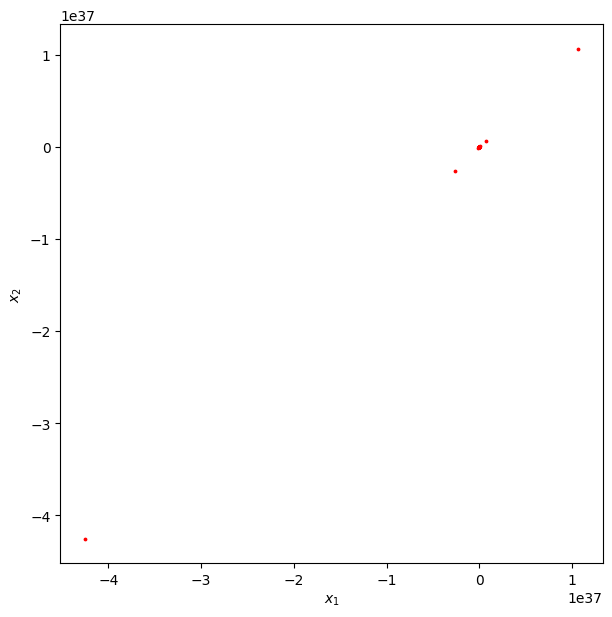

In [ ]:
import torch

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

optimizer = torch.optim.SGD([x], lr=0.25)

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    optimizer.step()
    optimizer.zero_grad()

for i in range(500):
    var_history.append(x.data.numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)

show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=3, c='r');
#plt.scatter - добавление точек на график
#первые два массива задают координаты точек Х и У, s - размер, с - цвет

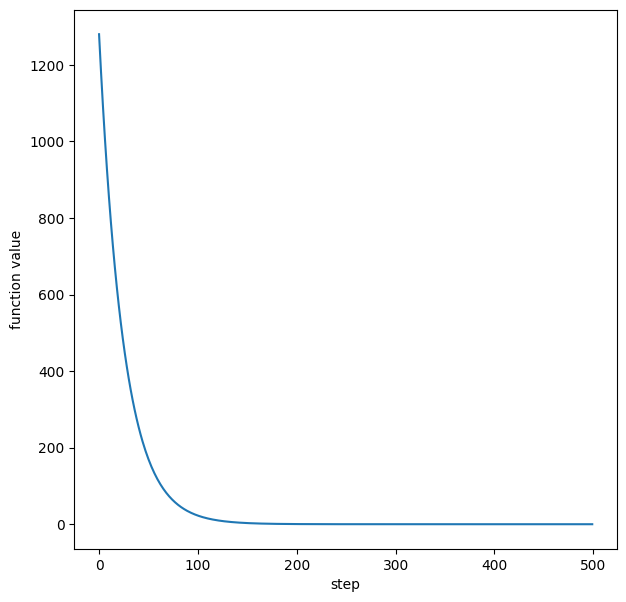

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(fn_history);
plt.xlabel('step')
plt.ylabel('function value');

Уменьшение происходит экспоненциально

# Задачи решаемы при помощи нейронных сетей

## Бинарная классификация, бинарная кросс-энтропия

Выбор функции потерь не зависит от характеристики модели

$$ \sigma'(y) = \sigma(y)(1 - \sigma(y))$$

$$MSE = (\sigma(y) - t)^2$$

$$MSE' = 2*(\sigma(y)-t)*\sigma(y)*(1-\sigma(y))$$

Здесь есть проблема, которая называется "паралич сигмоидной нейронной сети"

Суть: даже если у нас большое количество ошибки, всё равно возможна ситуация, когда производная будет равняться нулю, соответственно, если мы будем учить такую нейронную сеть при попомощи градиентного спуска, то у нас ничего не получится.

Вывод: плохая идея использовать функцию среднеквадратической ошибки в качестве функции потерь вместе с сигмоидной функцией активации на последнем слое

Что можно использовать в качестве функции потерь с сигмоидной функцией активации?

В качестве потерь с сигмоидной функцией активации можно использовать функцию "Бинарная кросс-энтропия"
$$
 BCE(p, t) = -t \log(p) - (1-t)\log(1-p)
$$

$$
p = \sigma(y)
$$

$$
\frac{\partial BCE}{\partial y} = \frac{\partial BCE}{\partial p} \frac{\partial p}{\partial y} = -\frac{t}{\sigma} \sigma' + \frac{1-t}{1-\sigma}\sigma'= -t(1-\sigma) + (1-t)\sigma = \sigma - t
$$

Бинарная кросс-энтропия - функция потерь, которая хорошо оценивает вероятности и любые значения, которые находятся в интервале от $[0,1]$

## Многоклассофая классификация. Софтмакс

Для решения многоклассовой классификации предлагается сделать по одному выходу на каждый класс. Для получения вероятности для каждого класса будем использовать другой подход

Сумма всех вероятностей(выходов) должна равняться единице.

В таком примере в качестве функции активации мы будем применять функцию "СофтМакс"

$$
SM_i(\vec{y})=\frac{e^{y_i}}{\sum^N_{j=1} e^{y_j}}
$$

Мы берём все выходы из сети и в эту степень возводим экспоненту. После этого для того, чтобы получить вероятность какого-то класса, мы берём экспоненту, которая соответствует этому классу, и делим на сумму всех экспонент

Свойства софт макс функции:
- $0<SM<1$
- $\sum_{i=1}^N SM_i = 1$

Продифференцируем софтмакс функцию:
$$
\frac{\partial SM_i}{\partial y_c} = \frac{-e^{y_i}e^{y_c}}{(\sum^N_{j=1}e^{y_j})^2}; y_c \neq y_i
$$
$y_c$ - некоторый выход из нейронной сети

Производная софтмакса по выходу:
$$
\frac{\partial SM_i}{\partial y_i}=\frac{e^{y_i}*\sum^n_{j=1}e^{y_j} - e^{y_i}*e^{y_i}}{(\sum_{j=1}^N e^{y_j})^2} = SM_i(1-SM_i)
$$

$$
\frac{\partial}{\partial y_i} \sum^n_{j=1} e^{y_j} = \frac{\partial}{\partial y_i} e^{y_i} = e^{y_i}
$$

Функция активации - софтмакс
Функция потерь - кросс энтропия
$$
CE(p,t) = - \sum^N_{c=1}t_c \log p_c
$$

Кросс энтропия - минус сумма всех классов от 1 до N.

$t_c$ - таргетное значение для класса

$p_c$ - вероятность этого класса

Верояность класса - софтмакс от выходов из нейронной сети.

Таргетное значение для класса - ноль почти для всех классов кроме одного, который присутствует на этой картинке

Когда у нас будет два класса, софтмакс будет выглядеть как сигмоида. Кросс энтропия на два класса выглядит как бинарная кросс энтропия

Убедимся, что кросс энтропия - хорошая функция потерь для функции активации софтмакс

$$
\frac{\partial CE}{\partial y_i} = -\frac{t_i}{p_i} \frac{\partial SM_i}{\partial y_i} - \sum_{c \neq i} \frac{t_c}{p_c} \frac{\partial SM_c}{\partial y_i} = - \frac{t_i}{p_i} p_i(1-p_i)+ \sum_{c \neq i} t_c \frac{1}{p_c} p_i p_c = -t_i(1-p_i) + \sum_{c \neq i} t_c p_i = -t_i + p_i
$$

Производная кросс энтропии по выходу из нейронной сети линейна

Софт макс не совсем функция активации


## Локализация, детекция, сегментация и super-resolution

### Задача локализации и детекции

У нас есть картинка. На этой картинке где-то есть объект. Что нужно сделать для решения этой задачи?

- Один из выходов нейронной сети должен говорить о вероятности нахождения на картинке объекта. (p)
- Параметризация прямоугольника, включащего в себя объект $x_c, y_c$ - координаты центра
- ширина (w) и высота (h)

Эта задача будет решаться с некоторым количеством ограничений:
- на картинке может быть либо один объект, либо ни одного
- если центр объекта лежит в пределах картинки, то мы считаем, что объект на картинке есть, в ином случае, мы считаем, что его нет.
- объект может выходить за пределы картинки

На выход вероятности можно использовать сигмоидную функцию активации.

На выходы центра можно также использовать сигмоидную функции активации. Таким образом мы сможем задать центр объекта относительно картинки.

Высота и ширина - экспоненты от соответствующих выходов

На выходы вероятности, центра в качестве функции потерь можно использовать бинарную кросс энтропию

В качестве функции потерь для высоты и ширины можно использовать средний квадрат ошибки от выхода сети до функции активации с логарифмом таргетного значения

$$
p = \sigma(y_0);    BCE(\sigma(y_0), \widetilde{I})\\
x_c = \sigma(y_1);  BCE(\sigma(y_1), \widetilde{x_c})\\
y_c = \sigma(y_2);  BCE(\sigma(y_2), \widetilde{y_c})\\
w = \exp(y_3);      MSE(y_3, \log{\widetilde w})\\
h = \exp(y_4);      MSE(y_4, \log{\widetilde h})
$$

$$
L = BCE(\sigma(y_0), \widetilde{w}) + \widetilde I \Bigg(BCE(\sigma(y_1), \widetilde{x_c})+BCE(\sigma(y_2), \widetilde{y_c})+MSE(y_3, \log{\widetilde w}))+MSE(y_4, \log{\widetilde h}\Bigg)
$$

### Сегментация

На выходе из нейросети будет картинка, где каждый пиксель дифференцируется(есть кот или нет)

Функция активации - сигмоида
Функция потерь - бинарная кросс энтропия по каждому пикселю и сложения по всех картинке

$$
L = \sum_j BCE(\sigma(y_j), t_j)
$$

### Задача сжатия размерности

Это задача попадает в разряд задач обучения без учителя.

Сделать сеть, которую будем называть кодировщиком(инкодер). Она будет выдавать сжатое представление картинки(имбеддинг). Это изображение мы будем расшифровать при помощи сети, которая называется декодировщик(декодер). В результате мы должны получать такую же картинку, какая была на входе.

В качестве лосс функции можно взять среднеквадратичную ошибку между тем, что было и что получилось.

$$
L = \sum_j MSE(Img_j, \widetilde{Img_j})
$$

### Задача SuperResolution

Cуть: увеличени изображения

Мы берём картинки, сжимаем их, отдаём нейросети и результат сравниваем с исходным